In [1]:
from datetime import datetime

In [2]:
from pyspark.sql.types import StructType, StructField, FloatType, LongType, StringType

feats = []
f = open('features.txt')
for line_num, line in enumerate(f):
    if line_num == 0:
        # Timestamp
        feats.append(StructField(line.strip(), LongType(), True))
    elif line_num == 1:
        # Geohash
        feats.append(StructField(line.strip(), StringType(), True))
    else:
        # Other features
        feats.append(StructField(line.strip(), FloatType(), True))
    
schema = StructType(feats)

print(schema)

StructType(List(StructField(Timestamp,LongType,true),StructField(Geohash,StringType,true),StructField(geopotential_height_lltw,FloatType,true),StructField(water_equiv_of_accum_snow_depth_surface,FloatType,true),StructField(drag_coefficient_surface,FloatType,true),StructField(sensible_heat_net_flux_surface,FloatType,true),StructField(categorical_ice_pellets_yes1_no0_surface,FloatType,true),StructField(visibility_surface,FloatType,true),StructField(number_of_soil_layers_in_root_zone_surface,FloatType,true),StructField(categorical_freezing_rain_yes1_no0_surface,FloatType,true),StructField(pressure_reduced_to_msl_msl,FloatType,true),StructField(upward_short_wave_rad_flux_surface,FloatType,true),StructField(relative_humidity_zerodegc_isotherm,FloatType,true),StructField(categorical_snow_yes1_no0_surface,FloatType,true),StructField(u-component_of_wind_tropopause,FloatType,true),StructField(surface_wind_gust_surface,FloatType,true),StructField(total_cloud_cover_entire_atmosphere,FloatType,tru

In [4]:
#df = spark.read.format('csv').option('sep', '\t').schema(schema).load('/Volumes/evo/Datasets/NAM_2015_S/*')
# df = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:40910/nam_tiny.tdv')
# df = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:40910/datasets/nam_201501.tdv.gz')

# df = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:37000/data/nam/*')
df = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:37000/data/nam/nam_201509.tdv.gz')
# df_large = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:37000/data/nam/nam_201509.tdv.gz')
# df_entire = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:37000/data/nam/*')

# df.take(1)

In [4]:
df_large = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:40910/datasets/nam_201509.tdv.gz')


In [32]:
df_entire = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:40910/datasets/*')


In [8]:
# df.filter(df.snow_depth_surface != 0).take(5)

[Row(Timestamp=1426377600000, Geohash='cf7ecr4h2ps0', geopotential_height_lltw=136.53125, water_equiv_of_accum_snow_depth_surface=77.0, drag_coefficient_surface=0.0, sensible_heat_net_flux_surface=-39.57763671875, categorical_ice_pellets_yes1_no0_surface=0.0, visibility_surface=24221.587890625, number_of_soil_layers_in_root_zone_surface=3.0, categorical_freezing_rain_yes1_no0_surface=0.0, pressure_reduced_to_msl_msl=99602.0, upward_short_wave_rad_flux_surface=6.625, relative_humidity_zerodegc_isotherm=34.0, categorical_snow_yes1_no0_surface=0.0, u-component_of_wind_tropopause=27.527877807617188, surface_wind_gust_surface=16.158788681030273, total_cloud_cover_entire_atmosphere=100.0, upward_long_wave_rad_flux_surface=314.0560302734375, land_cover_land1_sea0_surface=1.0, vegitation_type_as_in_sib_surface=18.0, v-component_of_wind_pblri=12.31915283203125, albedo_surface=38.75, lightning_surface=0.0, ice_cover_ice1_no_ice0_surface=0.0, convective_inhibition_surface=-0.65234375, pressure_su

# Analysis

### Q1. [1 pt] Strangely Snowy: Find a location that contains snow while its surroundings do not. Why does this occur? Is it a high mountain peak in a desert?¶

In [4]:
df_large.createOrReplaceTempView("TEMP_DF")

started_at = datetime.now()

not_snow_all_year = spark.sql("SELECT  Geohash,avg(snow_cover_surface) FROM TEMP_DF group by Geohash having avg(snow_cover_surface) >= 99").collect()

for x in not_snow_all_year:
    print(x)
print(len(not_snow_all_year))

Row(Geohash='c1gxsefbz52p', avg(snow_cover_surface)=100.0)
Row(Geohash='c43hd76g0npb', avg(snow_cover_surface)=100.0)
Row(Geohash='c43g3722yrzz', avg(snow_cover_surface)=100.0)
Row(Geohash='c1nt970j5b5b', avg(snow_cover_surface)=100.0)
Row(Geohash='c1grzzxwt1bp', avg(snow_cover_surface)=100.0)
Row(Geohash='c436f3k4p8xb', avg(snow_cover_surface)=100.0)
Row(Geohash='c43jhzrrsbrz', avg(snow_cover_surface)=100.0)
Row(Geohash='c44hk1hy9u2p', avg(snow_cover_surface)=100.0)
Row(Geohash='c46sf3s53p80', avg(snow_cover_surface)=100.0)
Row(Geohash='c43gkzxxn6bp', avg(snow_cover_surface)=100.0)
Row(Geohash='c41tugrtwhzz', avg(snow_cover_surface)=100.0)
Row(Geohash='c458r20zx080', avg(snow_cover_surface)=100.0)
Row(Geohash='c43gb4ywdgrz', avg(snow_cover_surface)=100.0)
Row(Geohash='c438x5esgf00', avg(snow_cover_surface)=100.0)
Row(Geohash='c4459s8rz1xb', avg(snow_cover_surface)=100.0)
Row(Geohash='c43c1zbmntbp', avg(snow_cover_surface)=100.0)
Row(Geohash='c43e1f64v9bp', avg(snow_cover_surface)=100.

In [5]:
four_set = set()
for x in not_snow_all_year:
    print(x.Geohash[0:4])
    four_set.add(x.Geohash[0:4])
print(len(not_snow_all_year))
print(len(four_set))

c1gx
c43h
c43g
c1nt
c1gr
c436
c43j
c44h
c46s
c43g
c41t
c458
c43g
c438
c445
c43c
c43e
c41z
c43u
c44n
c41u
c439
c1q2
c1nt
c432
c43e
c1gr
c44n
c1gn
c43e
c41z
c452
c1nm
c1nr
c44p
c43c
c304
c43b
c460
c43m
c43h
c1gy
c43k
c1gr
c43d
c1gz
c1gx
c43u
c44p
c43d
c41t
c433
c44j
c1q0
c41x
c436
c438
c1pc
c1gx
c43f
c437
c439
c43d
c459
c1nq
c43c
c1nk
c1p5
c460
c436
c43s
c1gz
c1p8
c464
c41v
c3k8
c43k
c45b
c41u
c3hz
c41u
c304
c1pe
c41w
c445
c438
c3k0
c3k3
c43b
c41w
c436
c43h
c460
c43u
c458
c307
c458
c1pf
c437
c464
c44h
c36u
c41g
c44p
c1uh
c44h
c1gy
c43g
c3k2
c461
c41x
c41z
c304
c1nu
c41y
c1gy
c41z
c41w
c301
c36u
c1sn
c43j
c44h
c44w
c43k
c464
c1gq
c1gw
c301
c465
c44n
c43e
c43f
c439
c1nk
c1gz
c439
c1gr
c41v
c43s
c43h
c1sn
c41y
c1gq
c41v
c43f
c4r5
c1p4
c1gz
149
74


In [6]:
# df.createOrReplaceTempView("TEMP_DF")
groupList = list()
for y in four_set:
        param = y + '%'
        group = spark.sql("SELECT distinct Geohash,avg(snow_cover_surface) as avgSnow FROM TEMP_DF WHERE Geohash like '%s' group by Geohash" %param ).collect()
        print(param ) 
        print(len(group))
        groupList.append(group)
        
print(len(groupList))
print('Complete')
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

c3hz%
4
c43g%
5
c43m%
3
c1p4%
5
c41z%
4
c36u%
4
c1nr%
4
c460%
3
c1p8%
3
c41g%
4
c436%
4
c1nt%
4
c433%
4
c41x%
4
c452%
3
c1q0%
4
c3k8%
4
c43e%
4
c43f%
3
c1uh%
4
c458%
4
c1nm%
3
c41y%
3
c43b%
5
c459%
4
c43u%
4
c1pf%
3
c3k3%
4
c44n%
4
c1gz%
4
c1p5%
3
c44h%
5
c1pc%
4
c1nu%
4
c432%
5
c44j%
4
c1nk%
5
c439%
4
c304%
5
c1gn%
4
c43s%
4
c3k0%
5
c43h%
4
c3k2%
3
c44w%
3
c43k%
4
c41w%
5
c461%
4
c43c%
4
c1gx%
3
c43d%
4
c1gr%
5
c44p%
4
c1nq%
4
c41v%
5
c1gq%
4
c1gw%
4
c41u%
4
c438%
3
c1gy%
4
c1sn%
4
c43j%
2
c41t%
4
c445%
4
c1q2%
5
c4r5%
4
c46s%
4
c45b%
4
c301%
4
c464%
5
c465%
4
c1pe%
4
c307%
4
c437%
4
74
Complete
Finished. it's been 16343 seconds


In [7]:
for x in groupList:
    avg=0
    for y in x:
        avg= avg + y.avgSnow
    avg= avg/len(x)
    if avg<30:
        print(x)
#     print(avg)

[Row(Geohash='c1uhvnv5p8pb', avgSnow=7.283950617283951), Row(Geohash='c1uh66r1r02p', avgSnow=9.74074074074074), Row(Geohash='c1uhcd9k1n2p', avgSnow=100.0), Row(Geohash='c1uhqne01400', avgSnow=2.9135802469135803)]
[Row(Geohash='c3k0fgxqugeb', avgSnow=10.790123456790123), Row(Geohash='c3k0yw8m6us0', avgSnow=100.0), Row(Geohash='c3k0rj7e0zs0', avgSnow=21.506172839506174), Row(Geohash='c3k07d6swzkp', avgSnow=4.08641975308642), Row(Geohash='c3k00p3vw3gz', avgSnow=4.08641975308642)]


c1uhcd9k1n2p is a mountain peak(lavender peak)

### Q2. [1 pt] Lightning rod: Where are you most likely to be struck by lightning? Use a precision of at least 4 Geohash characters and provide the top 3 locations.

In [4]:
df_entire.createOrReplaceTempView("TEMP_DF")
started_at = datetime.now()
lightning = spark.sql("SELECT  Geohash,avg(lightning_surface) as avgLighting FROM TEMP_DF group by Geohash order by avgLighting DESC Limit 10 ").collect()

for x in lightning:
    print(x)
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(Geohash='9eqepuxk7x20', avgLighting=0.3952922077922078)
Row(Geohash='9g3h968ygj7z', avgLighting=0.3871753246753247)
Row(Geohash='9g3y52sgeceb', avgLighting=0.3758116883116883)
Row(Geohash='9g3ug8ckk4hp', avgLighting=0.3741883116883117)
Row(Geohash='9g3v7kxpuhh0', avgLighting=0.3741883116883117)
Row(Geohash='9g3m79nrf3zb', avgLighting=0.37337662337662336)
Row(Geohash='9g3mq3f7y6eb', avgLighting=0.3685064935064935)
Row(Geohash='9g2vntcg8c2p', avgLighting=0.35957792207792205)
Row(Geohash='9g3hegkvh55z', avgLighting=0.35714285714285715)
Row(Geohash='9g35cqggdn5z', avgLighting=0.35714285714285715)
Finished. it's been 780 seconds


I calculate the average lightning chances. The top 3 location is 9eqe, 9g3h, 9g3y

### Q3. [1 pt] Drying out: Choose a region in North America (defined by one or more Geohashes) and determine when its driest month is. This should include a histogram with data from each month.

In [5]:
dfList = list()
for x in range(1,13):
    if x<10:
        x = '0'+str(x)
    path = "hdfs://orion11:40910/datasets/nam_2015%s.tdv.gz" %x
#     print(path)
    df_1 = spark.read.format('csv').option('sep', '\t').schema(schema).load(path)
    dfList.append(df_1)
print(len(dfList))

12


In [6]:
#9q9n categorical_rain_yes1_no0_surface
from pyspark.sql.functions import substring
started_at = datetime.now()
for df_1 in dfList:  
    df_1.createOrReplaceTempView("TEMP_DF")
    dry_place = spark.sql("SELECT  substring(Geohash, 1, 4) as subGeo, AVG(categorical_rain_yes1_no0_surface) as avgRain FROM TEMP_DF group by subGeo having subGeo = '9q9n'").collect()
    for x in dry_place:
        print(x)
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(subGeo='9q9n', avgRain=0.0)
Row(subGeo='9q9n', avgRain=0.0603448275862069)
Row(subGeo='9q9n', avgRain=0.0)
Row(subGeo='9q9n', avgRain=0.0777027027027027)
Row(subGeo='9q9n', avgRain=0.020161290322580645)
Row(subGeo='9q9n', avgRain=0.0022935779816513763)
Row(subGeo='9q9n', avgRain=0.01639344262295082)
Row(subGeo='9q9n', avgRain=0.008333333333333333)
Row(subGeo='9q9n', avgRain=0.009259259259259259)
Row(subGeo='9q9n', avgRain=0.0021551724137931034)
Row(subGeo='9q9n', avgRain=0.0546218487394958)
Row(subGeo='9q9n', avgRain=0.0872093023255814)
Finished. it's been 3060 seconds


This is the avgerage rain chances for Hayward. January, March do not rain at all. 
<br>Bay Area<br>
![](./images/bayArea.jpg)<br>

### Q4. [2 pt] Travel Startup: After graduating from USF, you found a startup that aims to provide personalized travel itineraries using big data analysis. Given your own personal preferences, build a plan for a year of travel across 5 locations. Or, in other words: pick 5 regions. What is the best time of year to visit them based on the dataset?

In [3]:
dfList = list()
for x in range(1,13):
    if x<10:
        x = '0'+str(x)
    path = "hdfs://orion11:37000/data/nam/nam_2015%s.tdv.gz" %x
#     print(path)
    df_1 = spark.read.format('csv').option('sep', '\t').schema(schema).load(path)
    dfList.append(df_1)
print(len(dfList))

12


In [4]:
started_at = datetime.now()

month = 1
for df_1 in dfList:  
    df_1.createOrReplaceTempView("TRAVEL_DF")

    # F = 9/5(K − 273.15) + 32  68 to 72 °F, so K should be 293.15 to 295.37
    best_time = spark.sql("SELECT Timestamp, Geohash, avg(temperature_surface) as avgtemper, \
                             avg(relative_humidity_zerodegc_isotherm) as avghum FROM TRAVEL_DF \
                                group by Timestamp, Geohash \
                                  having avg(temperature_surface) > 293.15 \
                                     and avg(temperature_surface) < 295.37").collect()
    print('month:', month)
    month = month + 1
    
    count = 0
    for x in best_time:
        f = 9/5 * (x.avgtemper - 273.15) + 32
        c = (f - 32) * 5/9
        THI1 = 1.8 * c - (1 - x.avghum / 100) * (c - 14.3) + 32
    #     print(THI1)
        if count > 4 :
            break
        if THI1 >= 65 and THI1 < 75:
            count = count + 1
            print(x)
            print('THI1 value is:', THI1)

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

month: 1
Row(Timestamp=1420178400000, Geohash='8vkurbww01b0', avgtemper=293.17681884765625, avghum=48.0)
THI1 value is: 65.07032812500003
Row(Timestamp=1420178400000, Geohash='9usrkvqdgzez', avgtemper=295.30181884765625, avghum=15.0)
THI1 value is: 65.19922790527346
Row(Timestamp=1420178400000, Geohash='8uxh1ktytx00', avgtemper=294.80181884765625, avghum=21.0)
THI1 value is: 65.16533703613283
Row(Timestamp=1420178400000, Geohash='8uz0geczqhpz', avgtemper=294.42681884765625, avghum=27.0)
THI1 value is: 65.20519616699221
Row(Timestamp=1420178400000, Geohash='9kt3kq4je1kp', avgtemper=293.80181884765625, avghum=43.0)
THI1 value is: 65.55273718261722
month: 2
Row(Timestamp=1422748800000, Geohash='dw11jd7dct5b', avgtemper=294.15985107421875, avghum=89.0)
THI1 value is: 69.07964831542972
Row(Timestamp=1422748800000, Geohash='dw4ss4qugy6p', avgtemper=293.78485107421875, avghum=91.0)
THI1 value is: 68.5725953369141
Row(Timestamp=1422748800000, Geohash='9uf5eftyjhpb', avgtemper=294.6598510742187

* Pick the temperature_surface and relative_humidity_zerodegc_isotherm feature
* The Temperature-Humidity Index (THI) was calculated for each month using the formula developed by Kibler (1964):<br> 
from: https://www.researchgate.net/publication/304717353_An_Estimate_of_Thermal_Comfort_in_North-Central_Region_of_Nigeria <br>
THI1 = 1.8 × Ta - (1-RH)(Ta-14.3) + 32
    * Where Ta = average ambient monthly temperature in °C 
    * RH = average monthly relative humidity as a fraction of the unit
![](./images/THI1_index_table.png)<br>
* Most people will feel comfortable at colloquially a range of temperatures around 20 to 22 °C (68 to 72 °F). Thermal comfort: https://en.wikipedia.org/wiki/Thermal_comfort
* The recommended range of indoor relative humidity in air conditioned buildings is generally 30-60%. Relative humidity: https://en.wikipedia.org/wiki/Relative_humidity
* The formula converts a temperature from kelvin K to degrees Fahrenheit F: F = 9/5(K − 273.15) + 32
* The formula converts a temperature from Fahrenheit (°F) to Celsius (°C): C = (F - 32) * 5/9
<br>
<br>

| Best time(month) |    Geohash    | Average Temperature °F|  Average Humidity  |        THI1       |
|:---------------- |:--------------|:---------------------:|:------------------:|:-----------------:|
| April            | 9mpxfu4kdhhp  | 71.3                  | 45.0               | 67.17723297119144 |
| May              | c292jgr2bwxb  | 70.2                  | 43.0               | 66.27486669921878 |
| June             | 9xyjr7462xrz  | 70.2                  | 55.0               | 67.09072753906254 | 
| November         | djt12vdtexb0  | 70.9                  | 40.0               | 66.52801513671878 |
| December         | 9g76dbr175ez  | 70.4                  | 35.0               | 65.82714477539065 |




#### April, Geohash: 9mpxfu4kdhhp, Average Temperature °F: 71.3, Average Humidity: 45.0,  THI1: 67.17723297119144
![](./images/travel_01.png)<br>
#### May, Geohash: c292jgr2bwxb, Average Temperature °F: 70.2, Average Humidity: 43.0,  THI1: 66.27486669921878
![](./images/travel_02.png)<br>
#### June, Geohash: 9xyjr7462xrz, Average Temperature °F: 70.2, Average Humidity: 55.0,  THI1: 67.09072753906254
![](./images/travel_03.png)<br>
#### November, Geohash: djt12vdtexb0, Average Temperature °F: 70.9, Average Humidity: 40.0,  THI1: 66.52801513671878
![](./images/travel_04.png)<br>
#### December, Geohash: 9g76dbr175ez, Average Temperature °F: 70.4, Average Humidity: 35.0,  THI1: 65.82714477539065
![](./images/travel_05.png)<br>

### Q5. [1 pt] Escaping the fog: After becoming rich from your startup, you are looking for the perfect location to build your Bay Area mansion with unobstructed views. Find the locations that are the least foggy and show them on a map.

In [71]:
started_at = datetime.now()
df_entire.createOrReplaceTempView("TEMP_DF")
visibility = spark.sql("SELECT  Geohash,avg(visibility_surface) as avgVisibility FROM TEMP_DF WHERE Geohash like '9q9p%' or Geohash like '9q9n%' or Geohash like '9q9j%' or Geohash like '9q9m%' or Geohash like '9q9k%' or Geohash like '9q9h%' or Geohash like '9q8v%' or Geohash like '9q8y%' or Geohash like '9q8z%' group by Geohash order by avgVisibility DESC ").collect()
for x in visibility:
    print(x)
print(len(visibility))
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(Geohash='9q9jnpfx5rxb', avgVisibility=23811.522961255705)
Row(Geohash='9q9jv7p453zz', avgVisibility=23703.065985376827)
Row(Geohash='9q9m35ffeg7z', avgVisibility=23698.021476396112)
Row(Geohash='9q9kc8wprss0', avgVisibility=23675.469547196735)
Row(Geohash='9q9jdrny12rz', avgVisibility=23616.419106960297)
Row(Geohash='9q8zuzx3hzeb', avgVisibility=23600.692098283627)
Row(Geohash='9q9k4m9efqh0', avgVisibility=23497.428004600173)
Row(Geohash='9q9hp3c2xy5b', avgVisibility=23449.653520560052)
Row(Geohash='9q9hwsyh477z', avgVisibility=23436.152038374712)
Row(Geohash='9q9mbqzmqxrz', avgVisibility=23435.8553033342)
Row(Geohash='9q9pesk2gbs0', avgVisibility=23400.098629552464)
Row(Geohash='9q9j5h47k07z', avgVisibility=23329.623851402575)
Row(Geohash='9q9py8hurvup', avgVisibility=23277.991815833026)
Row(Geohash='9q9nky5sd52p', avgVisibility=23164.93542607814)
Row(Geohash='9q9nxfh005kp', avgVisibility=23088.525926889935)
Row(Geohash='9q9p887u91up', avgVisibility=22978.882014243467)
Row(Geohash

The list above has the best visibility in the bay area. 
Such as 9q9m35 is a good place to build a mansion. The address is S Grimmer Blvd:Fremont Blvd, Fremont, CA
<br>
![](./images/Grimmer.jpg)<br>

### Q6. [2 pt] SolarWind, Inc.: You get bored enjoying the amazing views from your mansion, so you start a new company; here, you want to help power companies plan out the locations of solar and wind farms across North America. Locate the top 3 places for solar and wind farms, as well as a combination of both (solar + wind farm). You will report a total of 9 Geohashes as well as their relevant attributes (for example, cloud cover and wind speeds).

In [5]:
started_at = datetime.now()

df.createOrReplaceTempView("SOLAR_WIND_DF")

print('Top 3 places for solar:')
cloud = spark.sql("SELECT Geohash, avg(total_cloud_cover_entire_atmosphere) as avgcloud, \
                     avg(surface_wind_gust_surface) as avgwind \
                       FROM SOLAR_WIND_DF WHERE land_cover_land1_sea0_surface = 1 \
                         and total_cloud_cover_entire_atmosphere >= 0 \
                           group by Geohash order by avgcloud ASC limit 3").collect()

for c in cloud:
    print(c)

print('Top 3 places for wind farms:')    
wind = spark.sql("SELECT Geohash, avg(total_cloud_cover_entire_atmosphere) as avgcloud, \
                    avg(surface_wind_gust_surface) as avgwind \
                      FROM SOLAR_WIND_DF WHERE land_cover_land1_sea0_surface = 1 \
                        and geopotential_height_surface > 80 \
                          and total_cloud_cover_entire_atmosphere >= 0 \
                            group by Geohash having avgwind > 6.5 order by avgwind DESC limit 3").collect()

for w in wind:
    print(w)

print('Top 3 places for solar and wind farms:')
solar_wind = spark.sql("SELECT Geohash, avg(total_cloud_cover_entire_atmosphere) as avgcloud, \
                          avg(surface_wind_gust_surface) as avgwind \
                            FROM SOLAR_WIND_DF WHERE land_cover_land1_sea0_surface = 1 \
                              and geopotential_height_surface > 80 \
                                and total_cloud_cover_entire_atmosphere >= 0 \
                                  group by Geohash having avgwind > 6.5").collect()


def comparator(e):
    return e.avgwind - e.avgcloud

solar_wind.sort(reverse=True, key=comparator)

count = 0
for sw in solar_wind:
    if count > 2:
        break
    count = count + 1
    print(sw, 'comb_solar_wind:', sw.avgwind - sw.avgcloud)

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Top 3 places for solar:
Row(Geohash='9mtz1cve0n5b', avgcloud=13.301871440195281, avgwind=2.864942249701797)
Row(Geohash='9mwj3j02xw0p', avgcloud=13.459723352318958, avgwind=3.1962075028795844)
Row(Geohash='9mtzhuf4cbrz', avgcloud=13.545972335231896, avgwind=2.6938682030719696)
Top 3 places for wind farms:
Row(Geohash='f9pz8wckcbw0', avgcloud=72.79739625711962, avgwind=9.304476408392457)
Row(Geohash='f9pbdppft8d0', avgcloud=82.01952807160293, avgwind=9.286219695969459)
Row(Geohash='f9rb1xc31tzz', avgcloud=73.3393002441009, avgwind=9.269183482989924)
Top 3 places for solar and wind farms:
Row(Geohash='d7jjffc3g57b', avgcloud=19.093572009764035, avgwind=7.262419868791074) comb_solar_wind: -11.83115214097296
Row(Geohash='9mq6w3hry67z', avgcloud=22.372660699755897, avgwind=6.57151263059883) comb_solar_wind: -15.801148069157067
Row(Geohash='d7jjtr7ksvh0', avgcloud=23.687550854353134, avgwind=7.485111079679649) comb_solar_wind: -16.202439774673486
Finished. it's been 2182 seconds


#### Example
* Top 1 place for solar: Geohash='9mtz1cve0n5b', avgcloud=13.301871440195281, avgwind=2.864942249701797
![](./images/solar_01.png)<br>
* Top 1 place for wind farm: Geohash='f9pz8wckcbw0', avgcloud=72.79739625711962, avgwind=9.304476408392457
![](./images/wind_01.png)<br>
* Top 1 place for solar and wind farm: Geohash='d7jjffc3g57b', avgcloud=19.093572009764035, avgwind=7.262419868791074, comb_solar_wind: -11.83115214097296
![](./images/solar_wind_01.png)<br>

### Q7. [2 pt] Climate Chart: Given a Geohash prefix, create a climate chart for the region. This includes high, low, and average temperatures, as well as monthly average rainfall (precipitation). Here’s a (poor quality) script that will generate this for you.
* Earn up to 1 point of extra credit for enhancing/improving this chart (or porting it to a more feature-rich visualization library)

The prefix geohash is 9q94r cutted from 9q94rzdk9 and it is a location in San Francisco.

In [3]:
#df = spark.read.format('csv').option('sep', '\t').schema(schema).load('/Volumes/evo/Datasets/NAM_2015_S/*')

dfList = list()
for x in range(1,13):
    if x<10:
        x = '0'+str(x)
    path = "hdfs://orion11:20910/datasets/nam_2015%s.tdv.gz" %x
    df_month = spark.read.format('csv').option('sep', '\t').schema(schema).load(path)
    dfList.append(df_month)

In [4]:
started_at = datetime.now()

# key: month
# value: month_data_list max_temp, min_temp, avg_temp, avg_rain
all_temp_rain_dict = dict()

month_index = 1
for df_month in dfList:
    df_month.createOrReplaceTempView("temp_rain_table")
    max_temp = 0
    min_temp = 0
    avg_temp = 0
    avg_rain = 0
    month_data = list()
    
    temp_rain = spark.sql("select max(temperature_surface) as max_temp,\
    min(temperature_surface) as min_temp,\
    avg(temperature_surface) as avg_temp,\
    avg(precipitable_water_entire_atmosphere) as avg_rain\
    from temp_rain_table").collect()

    for ele in temp_rain:
        month_data.append(ele.max_temp)
        month_data.append(ele.min_temp)
        month_data.append(ele.avg_temp)
        month_data.append(ele.avg_rain)
    
    all_temp_rain_dict[month_index] = month_data
    month_index += 1
    
print(all_temp_rain_dict)
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

{1: [321.3058776855469, 220.9600830078125, 278.4280017600881, 15.4007151189068], 2: [321.85589599609375, 218.9928436279297, 277.6198424566246, 13.73090510602658], 3: [325.72711181640625, 224.5123748779297, 282.37342680636027, 15.254122521463952], 4: [330.8544921875, 231.1042938232422, 285.6748562759392, 16.784410604823112], 5: [328.609619140625, 250.086181640625, 289.69650555733415, 21.304568438239144], 6: [328.758544921875, 263.453857421875, 293.3297806171615, 27.03816524232326], 7: [330.179931640625, 264.17919921875, 295.0883008215764, 30.93388773319382], 8: [331.390625, 265.593505859375, 295.26517995190824, 31.27203283472495], 9: [329.76318359375, 258.19873046875, 293.3856543802662, 28.357654699853768], 10: [326.630859375, 250.59478759765625, 289.5638638867643, 23.53296922862459], 11: [322.370849609375, 232.58804321289062, 285.06030274475773, 18.983783798604218], 12: [321.13922119140625, 226.92987060546875, 282.3588260704892, 16.793512732111274]}
Finished. it's been 3125 seconds


[[  1.         321.30587769 220.96008301 278.42800176  15.40071512]
 [  2.         321.855896   218.99284363 277.61984246  13.73090511]
 [  3.         325.72711182 224.51237488 282.37342681  15.25412252]
 [  4.         330.85449219 231.10429382 285.67485628  16.7844106 ]
 [  5.         328.60961914 250.08618164 289.69650556  21.30456844]
 [  6.         328.75854492 263.45385742 293.32978062  27.03816524]
 [  7.         330.17993164 264.17919922 295.08830082  30.93388773]
 [  8.         331.390625   265.59350586 295.26517995  31.27203283]
 [  9.         329.76318359 258.19873047 293.38565438  28.3576547 ]
 [ 10.         326.63085938 250.5947876  289.56386389  23.53296923]
 [ 11.         322.37084961 232.58804321 285.06030274  18.9837838 ]
 [ 12.         321.13922119 226.92987061 282.35882607  16.79351273]]


/home2/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


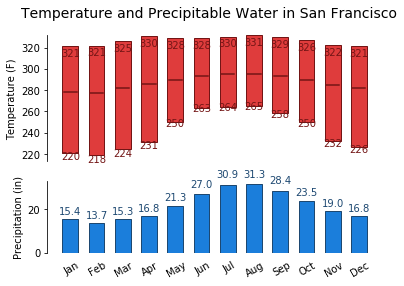

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib import rc

def c2f(t):
    return (t*9/5.0)+32

def k2c(t):
    return t-273.15

def k2f(t):
    return (t*9/5.0)-459.67

def disable_spines(ax):
    for s in ax.spines:
        ax.spines[s].set_visible(False)

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
use_c = False
converter = k2f
if use_c:
    converter = k2c

first_line = 'Temperature and Precipitable Water in San Francisco'

# convert dict into list list
data = list()
for month in all_temp_rain_dict:
    one_month = list()
    one_month.append(month)
    one_month = one_month + all_temp_rain_dict[month]
    data.append(one_month)

data = np.asarray(data)
print(data)

plt.ion()
plt.clf()
fig = plt.figure(1)
fig.subplots_adjust(hspace=.20)
gs = gridspec.GridSpec(2, 1, height_ratios=[1.75, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
plt.setp(ax0.get_xticklabels(), visible=False) # disable upper axis label

ax0.patch.set_facecolor('None')
ax1.patch.set_facecolor('None')

plt.suptitle(first_line, fontsize=14)

if k2c(data[:, 1]).min() < 5:
    y = 0
    if not use_c:
        y = c2f(0)
    ax0.plot([0, data[:, 1].max() + 1], [y, y], zorder=-1, color='#888888',
            alpha=.75, dashes=(8, 2))

# <month-num>  <high-temp>  <low-temp>  <avg-temp>  <avg-precip>  

rects0 = ax0.bar(.35 + data[:, 0], data[:, 2] - data[:, 1], bottom=data[:, 1],
        width=.6, color='#df3c3c', edgecolor='#731515')

rects1 = ax1.bar(.35 + data[:, 0], data[:, 4], color='#1b7edb', width=.6,
        edgecolor='#1d4871')

##################
plt.xticks(np.arange(0,12) + 1.4, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=30)

disable_spines(ax0)
disable_spines(ax1)
ax0.spines['left'].set_visible(True)
ax1.spines['left'].set_visible(True)

for tic in ax0.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

for tic in ax0.yaxis.get_major_ticks():
    tic.tick2On = False

for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False

for tic in ax1.yaxis.get_major_ticks():
    tic.tick2On = False

for rect in rects1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2., 1.08*height,
        '%.1f' % (height), ha='center', va='bottom', color='#1d4871')

for r, rect in enumerate(rects0):
    height = rect.get_height()
    ax0.text(rect.get_x() + rect.get_width()/2., rect.get_y() + 1.08*height,
        '%d' % int(height + rect.get_y()), ha='center', va='bottom',
        color='#731515')
    ax0.text(rect.get_x() + rect.get_width()/2., rect.get_y() - 2,
        '%d' % int(rect.get_y()), ha='center', va='top', color='#731515')
    ax0.plot([rect.get_x() + .05, rect.get_x() + rect.get_width() - .05],
            [data[r, 3], data[r, 3]], color='#731515')

if use_c:
    ax0.set_ylabel('Temperature (C)')
    ax1.set_ylabel('Precipitation (cm)')
else:
    ax0.set_ylabel('Temperature (F)')
    ax1.set_ylabel('Precipitation (in)')

![](./images/climate_chart.jpeg)<br>

### Q8. [2 pt] Influencers: Determine how features influence each other using Pearson’s correlation coefficient (PCC). The output for this job should include (1) feature pairs sorted by absolute correlation coefficient, and (2) a correlation matrix visualization (heatmaps are a good option).

In [5]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

#df = spark.read.format('csv').option('sep', '\t').schema(schema).load('/Volumes/evo/Datasets/NAM_2015_S/*')
df = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:20910/datasets/*')
df.take(1)

[Row(Timestamp=1430438400000, Geohash='dndf9tz5r8eb', geopotential_height_lltw=1915.593994140625, water_equiv_of_accum_snow_depth_surface=0.0, drag_coefficient_surface=0.0, sensible_heat_net_flux_surface=-12.571273803710938, categorical_ice_pellets_yes1_no0_surface=0.0, visibility_surface=24220.529296875, number_of_soil_layers_in_root_zone_surface=3.0, categorical_freezing_rain_yes1_no0_surface=0.0, pressure_reduced_to_msl_msl=101235.0, upward_short_wave_rad_flux_surface=4.25, relative_humidity_zerodegc_isotherm=95.0, categorical_snow_yes1_no0_surface=0.0, u-component_of_wind_tropopause=20.28228759765625, surface_wind_gust_surface=3.9325132369995117, total_cloud_cover_entire_atmosphere=98.0, upward_long_wave_rad_flux_surface=371.25927734375, land_cover_land1_sea0_surface=1.0, vegitation_type_as_in_sib_surface=10.0, v-component_of_wind_pblri=-3.47259521484375, albedo_surface=17.25, lightning_surface=0.0, ice_cover_ice1_no_ice0_surface=0.0, convective_inhibition_surface=-12.582763671875,

In [5]:
new_df = df.select([attr for attr in df.columns if attr != 'Geohash' and attr != '' and attr != None])
new_df.show(10)
# print(type(new_df))

+-------------+------------------------+---------------------------------------+------------------------+------------------------------+----------------------------------------+------------------+------------------------------------------+------------------------------------------+---------------------------+----------------------------------+-----------------------------------+---------------------------------+------------------------------+-------------------------+-----------------------------------+---------------------------------+-----------------------------+---------------------------------+-------------------------+--------------+-----------------+------------------------------+-----------------------------+----------------+------------------------------------------------+---------------------+------------------+---------------------------------+-----------------------------------+---------------------------------------+------------------------------+--------------------------

In [7]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from datetime import datetime

# learn the code from stackoverflow
# https://stackoverflow.com/questions/52214404/how-to-get-the-correlation-matrix-of-a-pyspark-data-frame

started_at = datetime.now()

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=new_df.columns, outputCol=vector_col)
df_vector = assembler.transform(new_df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)
big_array = matrix.collect()[0]["pearson({})".format(vector_col)].values

In [ ]:
########debug part##########
print(big_array)
print(len(new_df.columns))
new_df_size = new_df.count()
print(new_df_size)
print(type(matrix))
print(matrix.columns)
print(matrix.count())
########debug part##########

In [8]:
import numpy as np
new_array_shape = np.array(big_array).reshape(57,57)
print(new_array_shape)

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

[[ 1.00000000e+00  2.10992595e-01 -1.46878175e-01 ...  1.67444158e-01
  -2.74228419e-02  7.20470720e-10]
 [ 2.10992595e-01  1.00000000e+00 -4.13651883e-01 ...  7.56019969e-01
  -2.84870461e-01 -1.43293926e-01]
 [-1.46878175e-01 -4.13651883e-01  1.00000000e+00 ... -2.48875665e-01
   8.24040954e-02  1.24388344e-01]
 ...
 [ 1.67444158e-01  7.56019969e-01 -2.48875665e-01 ...  1.00000000e+00
  -3.32461824e-01 -2.76105810e-01]
 [-2.74228419e-02 -2.84870461e-01  8.24040954e-02 ... -3.32461824e-01
   1.00000000e+00  1.29285801e-01]
 [ 7.20470720e-10 -1.43293926e-01  1.24388344e-01 ... -2.76105810e-01
   1.29285801e-01  1.00000000e+00]]
Finished. it's been 1057 seconds


Finished. it's been 1670 seconds


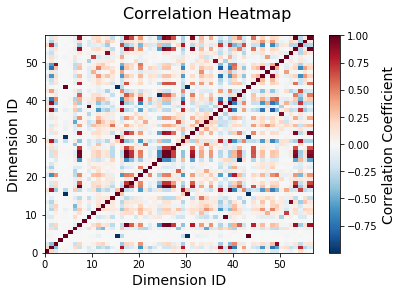

In [12]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

plt.suptitle('Correlation Heatmap', fontsize=16)
plt.xlabel('Dimension ID', fontsize=14)
plt.ylabel('Dimension ID', fontsize=14)

plt.pcolor(new_array_shape, cmap='RdBu_r')
cb = plt.colorbar()
cb.set_label('Correlation Coefficient', fontsize=14)

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

![](./images/influencer.jpeg)<br>

In [10]:
for i in range(len(new_df.columns)):
    for j in range(len(new_df.columns)):
        if i != j:
            print(f"{new_df.columns[i]}, {new_df.columns[j]}   {abs(new_array_shape[i][j])}")
            
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Timestamp, geopotential_height_lltw   0.21099259479468063
Timestamp, water_equiv_of_accum_snow_depth_surface   0.14687817488780314
Timestamp, drag_coefficient_surface   3.0241026489148342e-05
Timestamp, sensible_heat_net_flux_surface   0.04248312959936186
Timestamp, categorical_ice_pellets_yes1_no0_surface   0.002317680457766982
Timestamp, visibility_surface   0.038813997122541785
Timestamp, number_of_soil_layers_in_root_zone_surface   3.68211621028698e-11
Timestamp, categorical_freezing_rain_yes1_no0_surface   0.0011536351693803484
Timestamp, pressure_reduced_to_msl_msl   0.10619379652037524
Timestamp, upward_short_wave_rad_flux_surface   0.07865517628039459
Timestamp, relative_humidity_zerodegc_isotherm   0.026072700436986382
Timestamp, categorical_snow_yes1_no0_surface   0.025981811936992023
Timestamp, u-component_of_wind_tropopause   0.08070397057798072
Timestamp, surface_wind_gust_surface   0.001471516872852636
Timestamp, total_cloud_cover_entire_atmosphere   0.04253300196917523
T

drag_coefficient_surface, convective_available_potential_energy_surface   5.010194682799928e-05
drag_coefficient_surface, latent_heat_net_flux_surface   0.00016432881796130938
drag_coefficient_surface, surface_roughness_surface   0.00559930324126155
drag_coefficient_surface, pressure_maximum_wind   0.0003283066408142703
drag_coefficient_surface, temperature_tropopause   0.0002998822840316279
drag_coefficient_surface, geopotential_height_pblri   0.003225442161675312
drag_coefficient_surface, pressure_tropopause   7.915365974305299e-05
drag_coefficient_surface, snow_depth_surface   0.00036302050266275813
drag_coefficient_surface, v-component_of_wind_tropopause   0.0002246082302706197
drag_coefficient_surface, downward_short_wave_rad_flux_surface   0.004238682745592566
drag_coefficient_surface, u-component_of_wind_maximum_wind   0.0005037980805204943
drag_coefficient_surface, wilting_point_surface   0.003462145694100736
drag_coefficient_surface, precipitable_water_entire_atmosphere   0.00

### Q9. [2 pt] Prediction/Classification: Using what you learned above as your guide, choose a feature to predict or classify via machine learning models in MLlib. You will need to explain:
* The feature you will predict/classify
* Features used to train the model
* How you partitioned your data

In [7]:
from pyspark.ml.feature import VectorAssembler

started_at = datetime.now()
df = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:20910/datasets/nam_201512.tdv.gz')

def prepare_data(dframe, predictors, target):
    assembler = VectorAssembler(inputCols=predictors, outputCol="features")
    output = assembler.transform(dframe)
    return output.select("features", target).withColumnRenamed(target, "label")


prepped = prepare_data(df,
    [
#         "categorical_rain_yes1_no0_surface", 
#      "soil_type_as_in_zobler_surface", 
     "plant_canopy_surface_water_surface",
     "number_of_soil_layers_in_root_zone_surface",
     "vegitation_type_as_in_sib_surface",
       "temperature_surface"],
    "vegetation_surface")

prepped.show()
(trainingData, testData) = prepped.randomSplit([0.9, 0.1])

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.5,3.0,10.0,284...|39.25|
|(4,[3],[299.23229...|  0.0|
|(4,[3],[287.98229...|  0.0|
|(4,[3],[298.73229...|  0.0|
|(4,[3],[291.98229...|  0.0|
|[0.5,3.0,18.0,268...| 8.25|
|(4,[3],[297.60729...|  0.0|
|[0.5,3.0,12.0,273...|10.75|
|(4,[3],[281.60729...|  0.0|
|[0.25,3.0,10.0,26...| 7.25|
|[0.0,3.0,10.0,261...|  3.5|
|(4,[3],[294.85729...|  0.0|
|(4,[3],[271.85729...|  0.0|
|[0.0,3.0,12.0,295...|53.75|
|(4,[3],[297.85729...|  0.0|
|(4,[3],[297.10729...|  0.0|
|(4,[3],[300.48229...|  0.0|
|[0.0,3.0,7.0,265....|  1.0|
|[0.0,3.0,18.0,265...|  1.0|
|[0.5,3.0,12.0,273...| 13.5|
+--------------------+-----+
only showing top 20 rows



StructType(List(StructField(Timestamp,LongType,true),StructField(Geohash,StringType,true),StructField(geopotential_height_lltw,FloatType,true),StructField(water_equiv_of_accum_snow_depth_surface,FloatType,true),StructField(drag_coefficient_surface,FloatType,true),StructField(sensible_heat_net_flux_surface,FloatType,true),StructField(categorical_ice_pellets_yes1_no0_surface,FloatType,true),StructField(visibility_surface,FloatType,true),StructField(number_of_soil_layers_in_root_zone_surface,FloatType,true),StructField(categorical_freezing_rain_yes1_no0_surface,FloatType,true),StructField(pressure_reduced_to_msl_msl,FloatType,true),StructField(upward_short_wave_rad_flux_surface,FloatType,true),StructField(relative_humidity_zerodegc_isotherm,FloatType,true),StructField(categorical_snow_yes1_no0_surface,FloatType,true),StructField(u-component_of_wind_tropopause,FloatType,true),StructField(surface_wind_gust_surface,FloatType,true),StructField(total_cloud_cover_entire_atmosphere,FloatType,true),StructField(upward_long_wave_rad_flux_surface,FloatType,true),StructField(land_cover_land1_sea0_surface,FloatType,true),StructField(vegitation_type_as_in_sib_surface,FloatType,true),StructField(v-component_of_wind_pblri,FloatType,true),StructField(albedo_surface,FloatType,true),StructField(lightning_surface,FloatType,true),StructField(ice_cover_ice1_no_ice0_surface,FloatType,true),StructField(convective_inhibition_surface,FloatType,true),StructField(pressure_surface,FloatType,true),StructField(transpiration_stress-onset_soil_moisture_surface,FloatType,true),StructField(soil_porosity_surface,FloatType,true),StructField(vegetation_surface,FloatType,true),StructField(categorical_rain_yes1_no0_surface,FloatType,true),StructField(downward_long_wave_rad_flux_surface,FloatType,true),StructField(planetary_boundary_layer_height_surface,FloatType,true),StructField(soil_type_as_in_zobler_surface,FloatType,true),StructField(geopotential_height_cloud_base,FloatType,true),StructField(friction_velocity_surface,FloatType,true),StructField(maximumcomposite_radar_reflectivity_entire_atmosphere,FloatType,true),StructField(plant_canopy_surface_water_surface,FloatType,true),StructField(v-component_of_wind_maximum_wind,FloatType,true),StructField(geopotential_height_zerodegc_isotherm,FloatType,true),StructField(mean_sea_level_pressure_nam_model_reduction_msl,FloatType,true),StructField(temperature_surface,FloatType,true),StructField(snow_cover_surface,FloatType,true),StructField(geopotential_height_surface,FloatType,true),StructField(convective_available_potential_energy_surface,FloatType,true),StructField(latent_heat_net_flux_surface,FloatType,true),StructField(surface_roughness_surface,FloatType,true),StructField(pressure_maximum_wind,FloatType,true),StructField(temperature_tropopause,FloatType,true),StructField(geopotential_height_pblri,FloatType,true),StructField(pressure_tropopause,FloatType,true),StructField(snow_depth_surface,FloatType,true),StructField(v-component_of_wind_tropopause,FloatType,true),StructField(downward_short_wave_rad_flux_surface,FloatType,true),StructField(u-component_of_wind_maximum_wind,FloatType,true),StructField(wilting_point_surface,FloatType,true),StructField(precipitable_water_entire_atmosphere,FloatType,true),StructField(u-component_of_wind_pblri,FloatType,true),StructField(direct_evaporation_cease_soil_moisture_surface,FloatType,true),StructField(,FloatType,true)))



In [8]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

sc._conf.set('spark.driver.memory', '64g')
sc._conf.set('spark.executor.memory', '64g')

rf = RandomForestRegressor(numTrees=100, maxDepth=5, maxBins=32)
model = rf.fit(trainingData)
predictions = model.transform(testData)

evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 7.45108


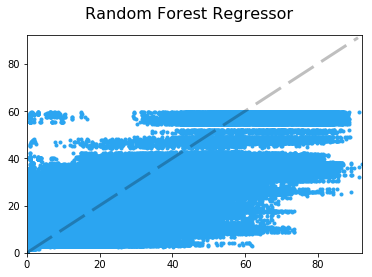

Finished. it's been 5111 seconds


In [9]:
import matplotlib.pyplot as plt

(sampleData, testData) = predictions.randomSplit([0.1, 0.9])

p_df = sampleData.select("label", "prediction").toPandas()

# p_df = predictions.select("label", "prediction").toPandas()

plt.suptitle('Random Forest Regressor', fontsize=16)

minval = p_df[['label', 'prediction']].min().min()
maxval = p_df[['label', 'prediction']].max().max()
plt.axis([minval, maxval, minval, maxval])

plt.plot(p_df['label'], p_df['prediction'], '.', color='#2ba5f1')
plt.plot(range(int(minval), int(maxval)), range(int(minval), int(maxval)), lw=3, dashes=(10, 3), color='#000000', alpha=0.25, label='Ideal Predictor')
plt.show()

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

# Option 1: Advanced Analysis
## You’ve had the opportunity to analyze two datasets thus far; now it’s time to analyze a dataset of your own. Find a dataset online and use Spark (or Hadoop) to analyze it. You should:

### 1. [0.5 pt] Describe the dataset
* Police Department Incident Reports: Historical 2003 to May 2018 in San Francisco <br>   [source from]: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry
* What's in this Dataset?
    * The .csv file(462.9 MB) contains:   
        * Rows: 2.21M 
        * Columns: 13 
        * Each row is a: Incident Report
* Here are features in the dataset:
    * IncidntNum
    * Category
    * Descript
    * DayOfWeek
    * Date
    * Time
    * PdDistrict
    * Resolution
    * Address
    * X
    * Y
    * Location
    * PdId
* Preview
![](./images/PDIR_dataset.png)<br>

### 2. [0.5 pt] Outline the types of insights you hope to gain from it
* Where is the most dangerous area in San Francisco ?
* What kind of incident happened most in San Francisco ?
* How many incidents were finally resolved ?
* Are there any reasons that may raise/drop the crime rate? Time? Place? Resolution rate？

### 3. [1 pt] Make hypotheses about what you might find
* Break in car (VANDALISM) happened a lot in San Francisco.
* None resolution may take somehow proportion.
* Annual crime rate should be dropped from 2003 to 2018.
* List some high incidence areas for 24 hours a day in order to remind people to avoid/pay more attention in those areas in a specific time.

In [2]:
df_option = spark.read.option("header","true").option("inferSchema","true").csv('hdfs://orion11:40910/option_dataset/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')


In [118]:
notComplete = df_option.filter(df_option.Category == "ASSAULT").count()
print(notComplete)

194694


In [124]:
df_option.createOrReplaceTempView("POLICE_DF")
spark.sql("select * from POLICE_DF limit 1").show()


+----------+--------+--------+---------+----------+-----+----------+--------------+--------------------+----------------+---------------+--------------------+--------------+
|IncidntNum|Category|Descript|DayOfWeek|      Date| Time|PdDistrict|    Resolution|             Address|               X|              Y|            Location|          PdId|
+----------+--------+--------+---------+----------+-----+----------+--------------+--------------------+----------------+---------------+--------------------+--------------+
| 140646669| ASSAULT| BATTERY|   Monday|08/04/2014|08:56|   MISSION|ARREST, BOOKED|500 Block of SOUT...|-122.41747701285|37.764357751686|(37.764357751686,...|14064666904134|
+----------+--------+--------+---------+----------+-----+----------+--------------+--------------------+----------------+---------------+--------------------+--------------+



### Q1. Since we are super rich, we hire the Batman to take justice in San Francisco for 5 hours. So list the timetable for the Batman, that is in which time periods happened the most incidents that need the Batman’s help.

In [3]:
started_at = datetime.now()
df_option.createOrReplaceTempView("POLICE_DF")
batman = spark.sql("SELECT substring(time, 1, 2 ) hour, count(*) as timecount FROM POLICE_DF  group by hour order by timecount DESC limit 5").collect()
for x in batman:
    print(x)
print(len(batman))
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(hour='18', timecount=140918)
Row(hour='17', timecount=135481)
Row(hour='12', timecount=132631)
Row(hour='19', timecount=126404)
Row(hour='16', timecount=125548)
5
Finished. it's been 5 seconds


So hour 18, hour 17, hour 12, hour 19, hour 16 are the top 5 hours happened most incidents in a day, which need Batman's help.

## Q2. 2003-2017 Break in car (VANDALISM) when and where

In [134]:
started_at = datetime.now()
vandalism = spark.sql("SELECT PdDistrict, count(*) c FROM POLICE_DF WHERE Category ='VANDALISM' group by PdDistrict order by c").collect()
count = 0
for x in vandalism:
    count = count + x.c
    print(x)
print(len(vandalism))
print('There are totally ' + str(count) + ' vandalisms')
for y in vandalism:
    print(y.PdDistrict)
    print(y.c/count)
print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(PdDistrict='TENDERLOIN', c=4214)
Row(PdDistrict='PARK', c=6554)
Row(PdDistrict='RICHMOND', c=7837)
Row(PdDistrict='TARAVAL', c=11607)
Row(PdDistrict='CENTRAL', c=12586)
Row(PdDistrict='INGLESIDE', c=13126)
Row(PdDistrict='MISSION', c=14050)
Row(PdDistrict='BAYVIEW', c=14103)
Row(PdDistrict='NORTHERN', c=14533)
Row(PdDistrict='SOUTHERN', c=17449)
10
There are totally 116059vandalism
TENDERLOIN
0.03630911863793415
PARK
0.05647127753987196
RICHMOND
0.06752599970704555
TARAVAL
0.10000947793794536
CENTRAL
0.10844484270931164
INGLESIDE
0.11309764860975884
MISSION
0.12105911648385735
BAYVIEW
0.12151578076667902
NORTHERN
0.12522079287259066
SOUTHERN
0.15034594473500548
Finished. it's been 1 seconds


![](./images/vandalism_total_chart.png)<br>
![](./images/vandalism_total_pie.png)<br>

In [135]:
started_at = datetime.now()
vandalism = spark.sql("SELECT substring(time, 1, 2 ) hour, count(*) as timecount FROM POLICE_DF WHERE Category ='VANDALISM' group by hour order by hour").collect()
for x in vandalism:
    print(x)
print(len(vandalism))

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(hour='00', timecount=6534)
Row(hour='01', timecount=4562)
Row(hour='02', timecount=4303)
Row(hour='03', timecount=2898)
Row(hour='04', timecount=1942)
Row(hour='05', timecount=1611)
Row(hour='06', timecount=1856)
Row(hour='07', timecount=2518)
Row(hour='08', timecount=3684)
Row(hour='09', timecount=3474)
Row(hour='10', timecount=3587)
Row(hour='11', timecount=3395)
Row(hour='12', timecount=4640)
Row(hour='13', timecount=3600)
Row(hour='14', timecount=4077)
Row(hour='15', timecount=4801)
Row(hour='16', timecount=5316)
Row(hour='17', timecount=7077)
Row(hour='18', timecount=8402)
Row(hour='19', timecount=7619)
Row(hour='20', timecount=7549)
Row(hour='21', timecount=7683)
Row(hour='22', timecount=7829)
Row(hour='23', timecount=7102)
24
Finished. it's been 1 seconds


It seems to happen a lot at the mid-night.<br>
![](./images/vandalism_hour_chart.png)<br>

In [136]:
started_at = datetime.now()
vandalism = spark.sql("SELECT substring(date, 1, 2 ) dates, count(*) as timecount FROM POLICE_DF WHERE Category ='VANDALISM' group by dates order by dates").collect()
for x in vandalism:
    print(x)
print(len(vandalism))

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(dates='01', timecount=9982)
Row(dates='02', timecount=8958)
Row(dates='03', timecount=10407)
Row(dates='04', timecount=10173)
Row(dates='05', timecount=9752)
Row(dates='06', timecount=9336)
Row(dates='07', timecount=10065)
Row(dates='08', timecount=9718)
Row(dates='09', timecount=9501)
Row(dates='10', timecount=10112)
Row(dates='11', timecount=9002)
Row(dates='12', timecount=9053)
12
Finished. it's been 1 seconds


![](./images/vandalism_month_chart.png)<br>

In [137]:
started_at = datetime.now()
vandalism = spark.sql("SELECT substring(date, 7, 4 ) year, count(*) as timecount FROM POLICE_DF WHERE Category ='VANDALISM' group by year order by year").collect()
# vandalism = spark.sql("SELECT substring(time, 1, 2 ) hour, date, PdDistrict FROM POLICE_DF WHERE Category ='VANDALISM' order by hour").collect()
for x in vandalism:
    print(x)
print(len(vandalism))

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(year='2003', timecount=6448)
Row(year='2004', timecount=6496)
Row(year='2005', timecount=7013)
Row(year='2006', timecount=7688)
Row(year='2007', timecount=7566)
Row(year='2008', timecount=7342)
Row(year='2009', timecount=7604)
Row(year='2010', timecount=7934)
Row(year='2011', timecount=7243)
Row(year='2012', timecount=7808)
Row(year='2013', timecount=6921)
Row(year='2014', timecount=7165)
Row(year='2015', timecount=7675)
Row(year='2016', timecount=8595)
Row(year='2017', timecount=9765)
Row(year='2018', timecount=2796)
16
Finished. it's been 1 seconds


![](./images/vandalism_year_chart.png)<br>

## Q3. 
### a. Top 10 Category and resolution rate. 

In [147]:
started_at = datetime.now()
category = spark.sql("SELECT a.Category, b.totalCount, a.resolveCount from (SELECT distinct Category, count(*) as resolveCount FROM POLICE_DF WHERE not Resolution ='NONE' group by Category) a inner join (SELECT distinct Category, count(*) as totalCount FROM POLICE_DF group by Category order by totalCount DESC limit 10) b on a.Category = b.Category order by b.totalCount DESC").collect()
for x in category:
    print(x)
print(len(category))

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(Category='LARCENY/THEFT', totalCount=480448, resolveCount=42521)
Row(Category='OTHER OFFENSES', totalCount=309358, resolveCount=221514)
Row(Category='NON-CRIMINAL', totalCount=238323, resolveCount=53465)
Row(Category='ASSAULT', totalCount=194694, resolveCount=80947)
Row(Category='VEHICLE THEFT', totalCount=126602, resolveCount=10622)
Row(Category='DRUG/NARCOTIC', totalCount=119628, resolveCount=109357)
Row(Category='VANDALISM', totalCount=116059, resolveCount=14169)
Row(Category='WARRANTS', totalCount=101379, resolveCount=95897)
Row(Category='BURGLARY', totalCount=91543, resolveCount=14890)
Row(Category='SUSPICIOUS OCC', totalCount=80444, resolveCount=9458)
10
Finished. it's been 2 seconds


Top 10 category, and their resolution rates

In [142]:
started_at = datetime.now()
category = spark.sql("SELECT distinct Category, count(*) as count FROM POLICE_DF WHERE not Resolution ='NONE' group by Category order by count DESC limit 10").collect()
for x in category:
    print(x)
print(len(category))

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(Category='OTHER OFFENSES', count=221514)
Row(Category='DRUG/NARCOTIC', count=109357)
Row(Category='WARRANTS', count=95897)
Row(Category='ASSAULT', count=80947)
Row(Category='NON-CRIMINAL', count=53465)
Row(Category='LARCENY/THEFT', count=42521)
Row(Category='MISSING PERSON', count=34672)
Row(Category='WEAPON LAWS', count=16164)
Row(Category='PROSTITUTION', count=15851)
Row(Category='BURGLARY', count=14890)
10
Finished. it's been 1 seconds


### b. Relationship between criminal increase rate and solved criminal rate

In [146]:
started_at = datetime.now()
category = spark.sql("SELECT distinct Category, count(*) as totalCount FROM POLICE_DF group by Category order by totalCount DESC limit 10").collect()
for x in category:
    print(x)
print(len(category))

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

Row(Category='LARCENY/THEFT', totalCount=480448)
Row(Category='OTHER OFFENSES', totalCount=309358)
Row(Category='NON-CRIMINAL', totalCount=238323)
Row(Category='ASSAULT', totalCount=194694)
Row(Category='VEHICLE THEFT', totalCount=126602)
Row(Category='DRUG/NARCOTIC', totalCount=119628)
Row(Category='VANDALISM', totalCount=116059)
Row(Category='WARRANTS', totalCount=101379)
Row(Category='BURGLARY', totalCount=91543)
Row(Category='SUSPICIOUS OCC', totalCount=80444)
10
Finished. it's been 1 seconds


In [157]:
started_at = datetime.now()
lists = list()
for x in category:
    types = x.Category
    yearResolution = spark.sql("SELECT a.year, a.totalCount, b.resolveCount from (SELECT substring(date, 7, 4 ) year, count(*) as totalCount FROM POLICE_DF WHERE Category = '%s' group by year) a inner join (SELECT substring(date, 7, 4 ) year, count(*) as resolveCount FROM POLICE_DF WHERE (not Resolution ='NONE') and Category = '%s' group by year )b on a.year = b.year order by a.year " %(types,types)).collect()
    print(types)
    lists.append(yearResolution)
    for x in yearResolution:
        print(str(x.year) +'  total = ' + str(x.totalCount) + '  resolution = '+str(x.resolveCount))
# for x in category:
#     print(x)
# print(len(category))

print("Finished. it's been " + str((datetime.now()-started_at).seconds) + " seconds")

LARCENY/THEFT
2003  total = 26393  resolution = 3844
2004  total = 24505  resolution = 3389
2005  total = 25319  resolution = 3346
2006  total = 27352  resolution = 3345
2007  total = 25770  resolution = 2879
2008  total = 25807  resolution = 3099
2009  total = 25585  resolution = 3014
2010  total = 24446  resolution = 2973
2011  total = 25905  resolution = 2729
2012  total = 30976  resolution = 2358
2013  total = 36412  resolution = 2777
2014  total = 38003  resolution = 2367
2015  total = 42068  resolution = 2135
2016  total = 40449  resolution = 1837
2017  total = 47826  resolution = 1882
2018  total = 13632  resolution = 547
OTHER OFFENSES
2003  total = 21232  resolution = 16295
2004  total = 20710  resolution = 15511
2005  total = 17834  resolution = 12901
2006  total = 18306  resolution = 12894
2007  total = 19763  resolution = 14910
2008  total = 23457  resolution = 18447
2009  total = 24693  resolution = 19452
2010  total = 20990  resolution = 15295
2011  total = 19552  resolut

In [162]:
for x in lists:
    for y in x:
        print(str(y.year) + '  ' + str(y.resolveCount/ y.totalCount))
    print('*****************')
    

2003  0.14564467851324214
2004  0.13829830646806773
2005  0.1321537185512856
2006  0.12229453056449255
2007  0.11171905316259216
2008  0.1200836982214128
2009  0.11780340042993942
2010  0.12161498813711855
2011  0.10534645821270025
2012  0.07612345041322315
2013  0.07626606613204438
2014  0.06228455648238297
2015  0.05075116478083103
2016  0.045415214220376275
2017  0.03935098063814661
2018  0.04012617370892019
*****************
2003  0.7674736247174077
2004  0.7489618541767262
2005  0.7233935179993272
2006  0.7043592264831203
2007  0.7544401153671001
2008  0.7864177004732062
2009  0.7877536143846434
2010  0.7286803239637922
2011  0.7245806055646481
2012  0.6669526976295184
2013  0.7144250513347022
2014  0.7014464802314369
2015  0.6578844078108135
2016  0.6416780943674133
2017  0.6178204848220136
2018  0.6073994252873564
*****************
2003  0.13263366035439958
2004  0.1505298301640296
2005  0.16549270722162931
2006  0.21289646918013166
2007  0.23309931371775658
2008  0.236771519141

![](./images/incidents_number.png)<br>
![](./images/solved_criminal_rate.png)<br>

LARCENY/THEFT, NON-CRIMINAL and VANDALISM increased during 2003 to 2017.
LARCENY/THEFT and OTHER OFFENSES solved criminal rated dropped obviously during 2003 to 2017.
LARCENY/THEFT increased while the solved rated of that dropped.
But other kind of incidents' relationship between criminal increase rate and solved criminal rate are not obvious. There may have many other factors, like the the number of police, the techniques used for resolution, the cunning of the criminals.